In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

### Dane + wykres

Text(0, 0.5, 'y')

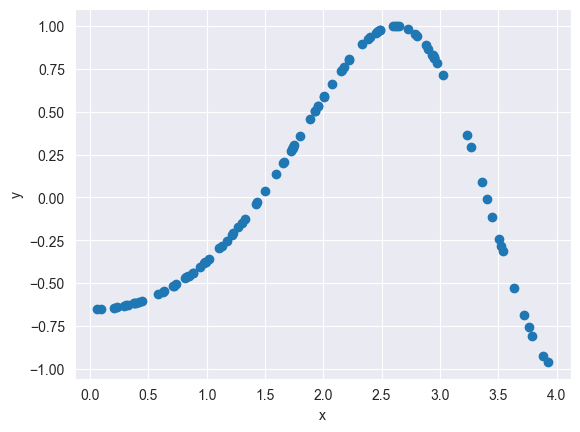

In [2]:
N = 100
x = np.random.uniform(0, 4, N)
y = np.cos(x**2/3+4)
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')

### Użycie biblioteki 

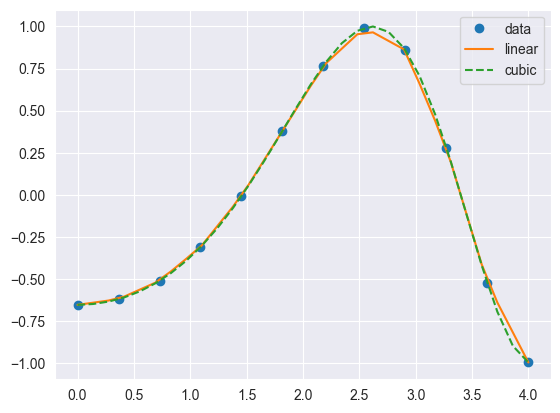

In [3]:
from scipy.interpolate import interp1d

x1 = np.linspace(0,4,12)
y1 = np.cos(x1**2/3+4)

f1 = interp1d(x1, y1, kind = 'linear')
f2 = interp1d(x1, y1, kind = 'cubic')

xnew = np.linspace(0, 4,30)

plt.plot(x1, y1, 'o', xnew, f1(xnew), '-', xnew, f2(xnew), '--')

plt.legend(['data', 'linear', 'cubic'])

plt.show()

### Od początku

In [4]:
data_x = np.linspace(0,4,12)

def equation_for_y(x):
    return [np.cos(val**2/3 + 4) for val in x]

def find_the_neighbours(x, data_x, func_y):
    data_x = list(data_x)
    data_x.append(x)
    sorted_data_x = sorted(data_x)
    data_y = func_y(sorted_data_x)
    
    ind_x = sorted_data_x.index(x)
    x1 = sorted_data_x[ind_x-1]
    x2 = sorted_data_x[ind_x+1]
    y1 = data_y[ind_x-1]
    y2 = data_y[ind_x+1]
    
    return x1,y1,x2,y2

def linear_interpolate(x, data_x, func_y):
    x1, y1, x2, y2 = find_the_neighbours(x, data_x, func_y)
    
    return y1 + (x-x1)* (y2-y1)/(x2-x1)
    

In [5]:
linear_interpolate(1, data_x, equation_for_y)

-0.36055028536820866

In [6]:
def show_interpolation(data_x):
    x_values = np.linspace(0, 4, 100)
    interpolated_y = [linear_interpolate(x, data_x, equation_for_y) for x in x_values]
    
    plt.plot(x_values, interpolated_y, 'y-', label='Interpolated')
    plt.plot(data_x, equation_for_y(data_x), 'bo', label='Original data')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Interpolacja liniowa')
    plt.legend()
    plt.show()

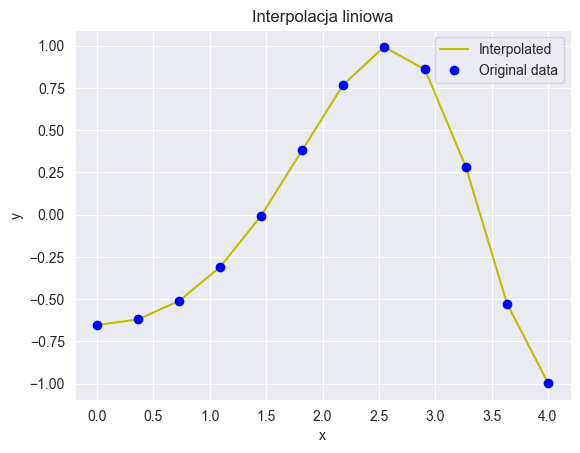

In [7]:
show_interpolation(data_x)

### Interpolacja sześcienna

In [8]:
import sympy as sp
x_data = data_x[::3]
x_data2 = np.linspace(0, 4, 4)
y_data = equation_for_y(x_data)
y_data2 = equation_for_y(x_data2)

def cubic_interpolation(x, data_x, data_y):
    a0, a1, a2, a3 = sp.symbols('a0 a1 a2 a3')
    
    equations = []
    
    for i in range(len(data_x)):
        equations.append(a0 + a1 * data_x[i] + a2 * data_x[i]**2 + a3 * data_x[i]**3 - data_y[i])
    
    solution = sp.solve(equations, (a0, a1, a2, a3))
    a0 = solution[a0]
    a1 = solution[a1]
    a2 = solution[a2]
    a3 = solution[a3]
    
    return a0 + a1*x + a2*x**2 + a3*x**3

In [9]:
cubic_interpolation(1, x_data, y_data)

-0.398839469028656

In [10]:
def show_cubic_interpolation(x_data, y_data):
    x_values = np.linspace(0, 4, 100)
    interpolated_y = [cubic_interpolation(x, x_data, y_data) for x in x_values]
    
    plt.plot(x_values, interpolated_y, 'y-', label='Interpolated')
    plt.plot(data_x, equation_for_y(data_x), 'bo', label='Original data')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Interpolacja sześcienna')
    plt.legend()
    plt.show()

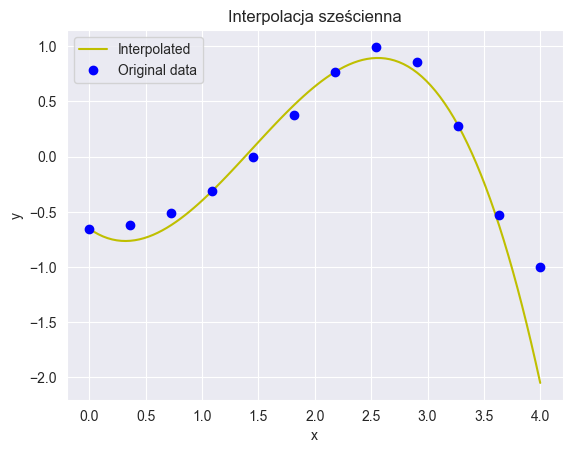

In [11]:
show_cubic_interpolation(x_data, y_data)

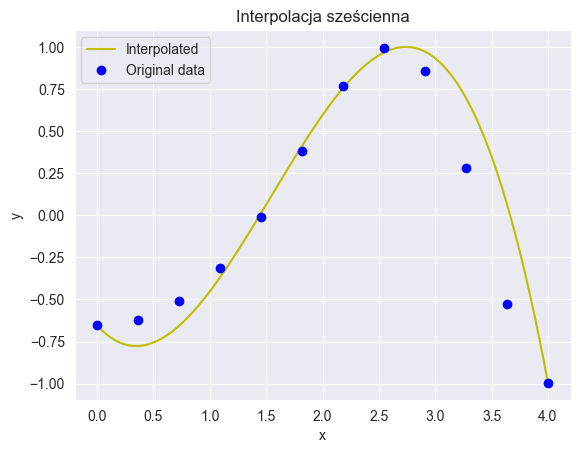

In [12]:
show_cubic_interpolation(x_data2, y_data2)

### Lagrangea

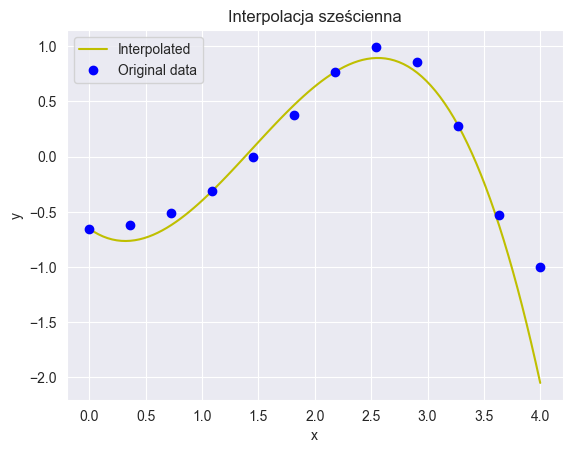

In [13]:
x2 = np.linspace(0, 4, 4)
y2 = equation_for_y(x2)
f = interpolate.lagrange(x_data, y_data)
xnew = np.linspace(0, 4, 100)

plt.plot(xnew, f(xnew), 'y-', label='Interpolated')
plt.plot(data_x, equation_for_y(data_x), 'bo', label='Original data')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolacja sześcienna')
plt.legend()
plt.show()